# Report Project 2 DRLND Udacity
**Continuous Control project**

---

This project will work with [Reacher](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) environment.

In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run! 

As I am using the Udacity workspace, below is the necessary code to be executed in order to run the environment.

In [0]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [0]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [0]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [0]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

Then, to retrain the agent, `train_mode=False` need to be set.

In [0]:
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1064999976195395


When finished, you can close the environment. The environment will be closed at the end of this notebook.

In [0]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

**Importing the necessary libraries**

In [0]:
from collections import deque
import matplotlib.pyplot as plt
import torch
import time
import random
import ddpg_agent

%matplotlib inline

**Calling the `DDPG_Agent` function**

In [0]:
agents = ddpg_agent.DDPG_Agent(state_size=state_size, action_size=action_size, num_agents = num_agents, random_seed=0)
n_episodes = 1000
print_every = 20

**Training the agent**

Below are the first result, where I used below parameters in DDPG Agent.
```
BUFFER_SIZE = int(1e5)  # replay buffer size (1e6 in original paper)

BATCH_SIZE = 128        # minibatch size (64 in original paper)

GAMMA = 0.99            # discount factor

TAU = 1e-3              # for soft update of target parameters

LR_ACTOR = 1e-4         # learning rate of the actor 

LR_CRITIC = 1e-3        # learning rate of the critic

WEIGHT_DECAY = 0        # L2 weight decay (1e-2  in original paper)
```

Model used are

1. 2 fully connected layers, where the first layer has 400 nodes and the second one has 300 nodes.
2. No dropout layer in between.
3. ReLU is used for the activation function.

Results:

After 151 episodes, an average score of +30 is obtained.

This experiment is done in multiple (20) agents environment. 

In [0]:
def ddpg(n_episodes=2000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores = []
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agents.reset()
        score = np.zeros(num_agents)
        #print (state.shape)
        for t in range(max_t):
            action = agents.act(state)
            #print (action)
            #time.sleep(100)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            #print (state.shape)
            #print (rewards.shape)
            agents.step(state, action, rewards, next_state, dones)
            state = next_state
            score += rewards
            if np.any(dones):
                print('\tSteps: ', t)
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f}'.format(i_episode, 
                                                                          np.mean(scores_deque), 
                                                                          np.mean(score)))
        average_score = np.mean(scores_deque)
        if i_episode % print_every == 20 or average_score > 30:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))
            torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth') 
            if average_score > 30:
                break
    return scores

In [0]:
scores = ddpg()

Episode 1	Average Score: 0.72	Score: 0.715
Episode 2	Average Score: 0.79	Score: 0.858
Episode 3	Average Score: 0.80	Score: 0.826
Episode 4	Average Score: 0.81	Score: 0.852
Episode 5	Average Score: 0.78	Score: 0.653
Episode 6	Average Score: 0.81	Score: 0.964
Episode 7	Average Score: 0.86	Score: 1.173
Episode 8	Average Score: 0.94	Score: 1.443
Episode 9	Average Score: 0.99	Score: 1.440
Episode 10	Average Score: 1.02	Score: 1.230
Episode 11	Average Score: 1.02	Score: 1.044
Episode 12	Average Score: 1.04	Score: 1.280
Episode 13	Average Score: 1.09	Score: 1.754
Episode 14	Average Score: 1.22	Score: 2.825
Episode 15	Average Score: 1.33	Score: 2.868
Episode 16	Average Score: 1.44	Score: 3.070
Episode 17	Average Score: 1.57	Score: 3.639
Episode 18	Average Score: 1.70	Score: 4.012
Episode 19	Average Score: 1.80	Score: 3.614
Episode 20	Average Score: 1.93	Score: 4.353
Episode 21	Average Score: 2.06	Score: 4.668
Episode 22	Average Score: 2.23	Score: 5.834
Episode 23	Average Score: 2.39	Score: 5.8

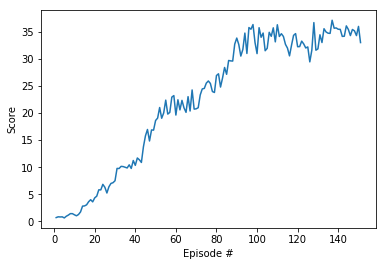

In [0]:
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [0]:
env.close()

### Other Experiments

Below are results for other experiments done with some parameters tuned and models changed.

**2nd Experiment**

Parameters:

BUFFER_SIZE = int(1e5)  # replay buffer size (1e6 in original paper)

BATCH_SIZE = 128        # minibatch size (64 in original paper)

GAMMA = 0.99            # discount factor

TAU = 1e-3              # for soft update of target parameters

LR_ACTOR = 1e-4         # learning rate of the actor 

LR_CRITIC = 1e-3        # learning rate of the critic

WEIGHT_DECAY = 0        # L2 weight decay (1e-2  in original paper)

Model:

1. Add dropout layers with probability of 0.2.
2. 2 fully connected layers with size of 400 and 300 nodes.!
3. Use ReLU for activation function.

Result:
Obtained an average score of 30.08 after 148 episodes.

The plotted graph is as below. 

<img src= "cc_2.png">


**3rd experiment**

The replay buffer size is changed to $10^6$ and learning parmaeter for critic control is changed to $10^{-4}$. 

Result:
Average score of 30.22 is achieved at episode 102.

The plotted graph is as below.

<img src="cc_3.png">


**4th experiment**

Change is made in the model, where the dropout layer is excluded.

Result:
Average score of 30.37 is obtained at episode 103.

Graph:

<img src= "cc_4.png">

**5th experiment**

Change is made in the batch size from 128 to 64.

Result:
Average score of 30.18 is achieved at episode 106.

Graph:

<img src="cc_5.png">

**Other experiments**

1. I have excluded some experiments in the result when I tried to reduce and increase the fully connected layer's size. Unfortunately, the training became very slow, thus I have concluded the size of 400 and 300 are the best.

2. I have also tried to train for one agent using the last parameter, and the average score of 30.20 is achieved at episode 109. The obtained training curve is as below.

<img src = "cc_6.png">

### Discussions

All of the experiments above use the Deep Deterministic Policy Gradient(DDPG) according to the "Continuous Control with Deep Reinforcement Learning" paper. The actor-critic, model-free algorithm based on the DDPG that can operate over continuous action spaces is adapted in this paper. This paper also used reacher as one of its tested environments. This approach has several benefits such as data efficiency, and has been successfully applied to real-world applications. Fewer steps of experience was used by this method compared to the DQN learning.

DDPG uses 4 neural networks, which are the Q network, the deterministic policy network, the target Q network and the target policy network. In DDPG, the Actor directly maps states to actions (the output of the network directly the output) instead of outputting the probability distribution acrossa discrete action space. DDPG also uses a replay buffer to sample experience to update the neural network parameters. 

### Conclusion

By adding dropout layers and increasing the batch size, the required episodes to train the agent can also be reduced. However, changing the size of fully connected layers might affects the training performance.

### Future works

Explore the implementation in Proximal Policy Optimization (PPO) and Distributed Distributional Deterministic Policy Gradients.

Try the DDPG in crawler environment.